In [1]:
from lib.models import SimpleNN
from lib.pinn import PINN, ResidualCalculator
import torch

In [2]:
#weights = torch.load('weights/cosine/weights_100.pth', map_location='cpu')
weights = torch.load('checkpoints/weights.pt', map_location='cpu')
model = SimpleNN([2,32,32,32,1])
model = PINN(model, ResidualCalculator(), 'cpu')
model.load_state_dict(weights)
model.eval()

PINN(
  (net): SimpleNN(
    (fc): Sequential(
      (0): Linear(in_features=2, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=32, bias=True)
      (5): Tanh()
      (6): Linear(in_features=32, out_features=1, bias=True)
    )
  )
)

In [10]:
x = torch.linspace(-4, 4, 100)
y = torch.linspace(-2, 2, 100)
X, Y = torch.meshgrid(x, y)
x = X.flatten().unsqueeze(1)
y = Y.flatten().unsqueeze(1)

y = model((x,y)).detach().numpy()

X = X.detach().numpy()
Y = Y.detach().numpy()
y = y.reshape(X.shape)

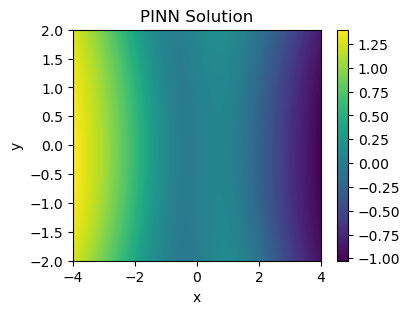

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.contourf(X, Y, y, levels=100)
plt.colorbar()
plt.title('PINN Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

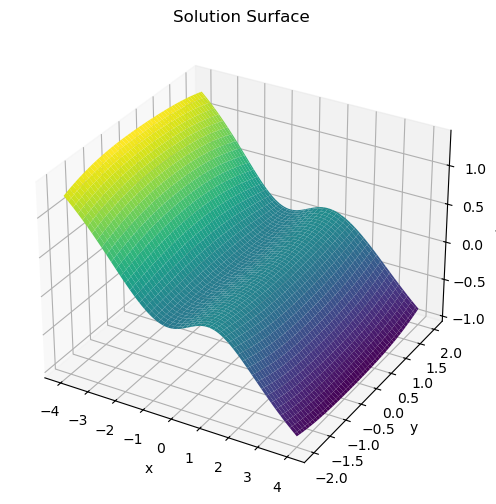

In [12]:
# Plot the solution in 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, y, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Solution Surface')
plt.show()